In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df= pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [6]:
df.shape

(2000, 2)

In [7]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:

def preprocess_text(text):
  # Remove punctuation
  text = ''.join([char for char in text if char not in string.punctuation])
  #Convert to lowercase
  text = text.lower()
  # Tokenize
  tokens = word_tokenize(text)
  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

df['text_processed'] = df['Labels'].apply(preprocess_text)

df['text_processed']

0             [altatheism]
1             [altatheism]
2             [altatheism]
3             [altatheism]
4             [altatheism]
               ...        
1995    [talkreligionmisc]
1996    [talkreligionmisc]
1997    [talkreligionmisc]
1998    [talkreligionmisc]
1999    [talkreligionmisc]
Name: text_processed, Length: 2000, dtype: object

In [43]:
# Feature Extraction (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform([' '.join(tokens) for tokens in df['text_processed']])
X

<2000x20 sparse matrix of type '<class 'numpy.float64'>'
	with 2000 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Labels' is your target variable
y = df['Labels']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 1.0
                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00        18
           comp.graphics       1.00      1.00      1.00        18
 comp.os.ms-windows.misc       1.00      1.00      1.00        22
comp.sys.ibm.pc.hardware       1.00      1.00      1.00        25
   comp.sys.mac.hardware       1.00      1.00      1.00        21
          comp.windows.x       1.00      1.00      1.00        25
            misc.forsale       1.00      1.00      1.00        18
               rec.autos       1.00      1.00      1.00        18
         rec.motorcycles       1.00      1.00      1.00        16
      rec.sport.baseball       1.00      1.00      1.00        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       1.00      1.00      1.00        19
         sci.electronics       1.00      1.00      1.00        16
                 sci.med       1.00      1.00      1.00      

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


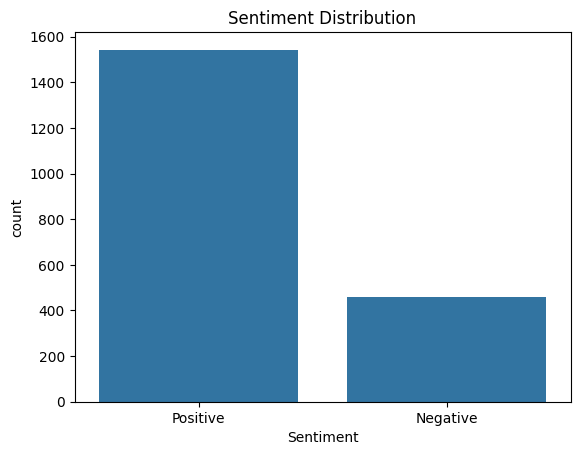

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


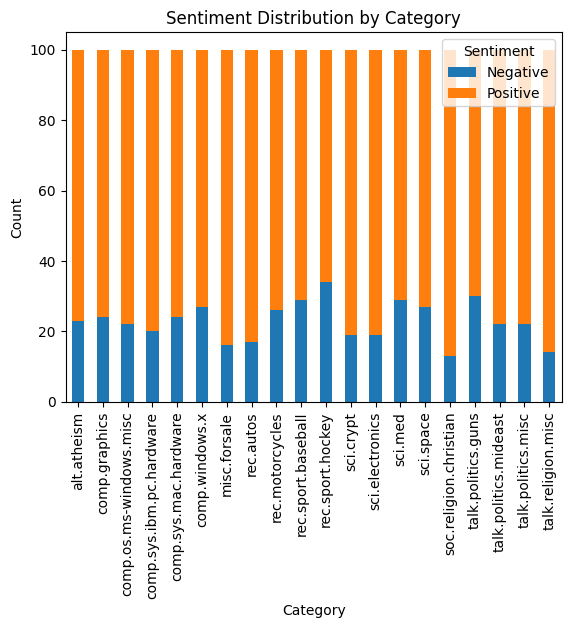

In [47]:
!pip install textblob

from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(analyze_sentiment)

# Examine sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


# Assuming you have a column named 'Category'
category_sentiment = df.groupby('Labels')['Sentiment'].value_counts().unstack(fill_value=0)
print(category_sentiment)

# Visualize sentiment distribution across categories
category_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# --- Model Performance and Challenges ---
"""
Discuss the performance of the model here. Look at the accuracy, precision,
recall, and F1-score from the classification report.  Are there any classes
that are particularly difficult to classify?  Why might this be?
"""

# --- Sentiment Analysis Insights ---
"""
Analyze the sentiment distribution. Are the blog posts generally positive,
negative, or neutral?  How does sentiment vary across different categories
(if you have categories in your dataset)? What insights can you draw about
the overall tone and emotional content of the blog posts?
"""


Accuracy: 1.0
                          precision    recall  f1-score   support

             alt.atheism       1.00      1.00      1.00        18
           comp.graphics       1.00      1.00      1.00        18
 comp.os.ms-windows.misc       1.00      1.00      1.00        22
comp.sys.ibm.pc.hardware       1.00      1.00      1.00        25
   comp.sys.mac.hardware       1.00      1.00      1.00        21
          comp.windows.x       1.00      1.00      1.00        25
            misc.forsale       1.00      1.00      1.00        18
               rec.autos       1.00      1.00      1.00        18
         rec.motorcycles       1.00      1.00      1.00        16
      rec.sport.baseball       1.00      1.00      1.00        18
        rec.sport.hockey       1.00      1.00      1.00        15
               sci.crypt       1.00      1.00      1.00        19
         sci.electronics       1.00      1.00      1.00        16
                 sci.med       1.00      1.00      1.00      

'\nAnalyze the sentiment distribution. Are the blog posts generally positive, \nnegative, or neutral?  How does sentiment vary across different categories \n(if you have categories in your dataset)? What insights can you draw about \nthe overall tone and emotional content of the blog posts?\n'